## PREDICT PEGI TAG ON A VIDEOGAME


In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [164]:
df = pd.read_csv('Video_games_esrb_rating.csv')          # Import Dataset from .csv file

In [165]:
df.head()                                              # Show header

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [166]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

# Encoding by LabelEncoder

In [167]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_new=df.copy()
df_new['esrb_rating']= labelencoder.fit_transform(df['esrb_rating'])

In [168]:
df_new.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,3


In [169]:
# Drop non-numeric columns
df_new.drop(['title'],axis=1,inplace=True)

<AxesSubplot:>

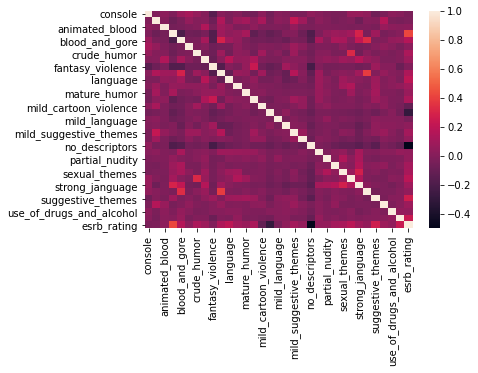

In [170]:
plt.figure(figsize=(6,4))                                  # Create a figure object with a specified figure size

sns.heatmap(df_new.corr())                                      # Plot Correlation Matrix as heatmap

In [171]:
from sklearn.model_selection import train_test_split            # Import train_test_split function from Scikit-Learn

In [172]:
# Convert columns of Pandas DataFrame to Numpy arrays

# Features
X = df_new.drop('esrb_rating',axis=1).values

# Target Variable
y = df_new['esrb_rating'].values

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)         # Train-Test Split

# KNN Classifier

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
n_neighbors={'n_neighbors' : np.arange(1,10)}

In [177]:
cv_knn =GridSearchCV(estimator=KNeighborsClassifier(), param_grid = n_neighbors, scoring='accuracy', cv = 5)

In [178]:
cv_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [179]:
cv_knn.best_params_

{'n_neighbors': 5}

In [180]:
cv_knn.best_score_

0.8198443291326909

In [208]:
y_pred_knn = cv_knn.predict(X_test)

In [209]:
conf_matrix_knn=confusion_matrix(y_pred_knn,y_test)

In [220]:
conf_matrix_knn

array([[122,  15,   2,   7],
       [  1,  72,   1,  24],
       [  0,   0,  73,  17],
       [  1,  10,  16, 113]], dtype=int64)

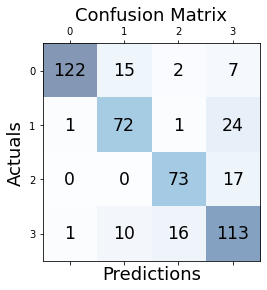

In [225]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix_knn, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_knn[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [211]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [212]:
print('Precision: %.3f'% precision_score(y_pred_knn,y_test, average='micro'))
print('Recall: %.3f' % recall_score(y_pred_knn,y_test, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_pred_knn,y_test))
print('F1 Score: %.3f' % f1_score(y_pred_knn,y_test, average='micro'))

Precision: 0.802
Recall: 0.802
Accuracy: 0.802
F1 Score: 0.802


# Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
param_grid = { 
    'bootstrap': [True],
    'n_estimators': np.arange(100,500,50),
    'max_depth' : np.arange(5,50,5),
}

In [188]:
rfc = RandomForestClassifier()

## Tuning by RandomizedSearchCV

In [189]:
from sklearn.model_selection import RandomizedSearchCV
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=10,cv= 5)
CV_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])})

In [190]:
CV_rfc.best_params_

{'n_estimators': 450, 'max_depth': 35, 'bootstrap': True}

In [191]:
y_pred_rfc = CV_rfc.predict(X_test)

In [192]:
CV_rfc.best_score_

0.8515221151470225

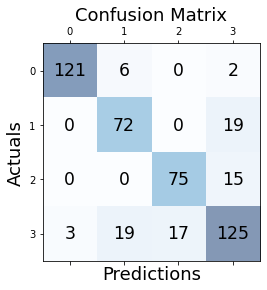

In [224]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix_rfc, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix_rfc.shape[0]):
    for j in range(conf_matrix_rfc.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rfc[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [195]:
print('Precision: %.5f'% precision_score(y_pred_rfc,y_test, average='micro'))
print('Recall: %.5f' % recall_score(y_pred_rfc,y_test, average='micro'))
print('Accuracy: %.5f' % accuracy_score(y_pred_rfc,y_test))
print('F1 Score: %.5f' % f1_score(y_pred_rfc,y_test, average='micro'))

Precision: 0.82911
Recall: 0.82911
Accuracy: 0.82911
F1 Score: 0.82911


# Support Vector Machine

In [196]:
from sklearn.svm import SVC

In [197]:
param_SVM = {'C':np.arange(100,1000,100),
            'gamma':np.arange(0.1, 0.8, 0.01)}

In [198]:
svc_model=SVC()

## Tuning by RandomizedSearchCV

In [199]:
rcv_svm = RandomizedSearchCV(estimator=svc_model, param_distributions = param_SVM, n_iter=10, cv = 5)

In [200]:
rcv_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'gamma': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79])})

In [201]:
rcv_svm.best_params_

{'gamma': 0.5899999999999997, 'C': 800}

In [202]:
y_pred_svm = rcv_svm.predict(X_test)

In [203]:
confusion_matrix(y_test,y_pred_svm)

array([[121,   0,   0,   3],
       [  0,  72,   0,  25],
       [  0,   0,  76,  16],
       [  1,  13,  15, 132]], dtype=int64)

In [204]:
rcv_svm.best_score_

0.860669631826044

In [205]:
conf_matrix_svm=confusion_matrix(y_pred_svm,y_test)

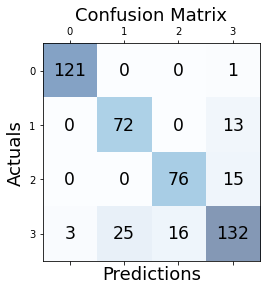

In [226]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix_svm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_svm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [227]:
print('Precision: %.5f'% precision_score(y_pred_svm,y_test, average='micro'))
print('Recall: %.5f' % recall_score(y_pred_svm,y_test, average='micro'))
print('Accuracy: %.5f' % accuracy_score(y_pred_svm,y_test))
print('F1 Score: %.5f' % f1_score(y_pred_svm,y_test, average='micro'))

Precision: 0.84599
Recall: 0.84599
Accuracy: 0.84599
F1 Score: 0.84599


Overall, the SVM resulted in better results compared to KNN and RFC